# name of tutorial series

## Table of contents


## 1. Preprocessing

### 1.1. [Motion Correction](# Motion Correction)
#### 1.1.1 What does it do and what type of choices can I make? 
#### 1.1.2 Do these choices matter?
0. [Set up your notebook](## Setting up the tutorial for your computer)
1. [OK, now let's explore what can happen](# Data without motion correction)

### 1.2. Slice Timing Correction
What does it do?

#### etc...

## 2. Reproducible Research Practices
####  Defensive coding
####  Why organizaton matters?
####  How can you document your procedures?

## n. Next topic



# Motion Correction


blah blah blah blah

The images shown in this tutorial were preprocessed using the same [C-PAC](https://fcp-indi.github.io/) pipeline, which has been used in the [ABIDE](http://fcon_1000.projects.nitrc.org/indi/abide/) open dataset. The preprocessing steps were identical except for the number of parameters chosen for motion correction.

[word](link)
![alt text](http://i.giphy.com/ubcXzHoh65uZG.gif)

![alt text](http://i.giphy.com/ubcXzHoh65uZG.gif)

## Setting up the tutorial for your computer

#### Import libraries

The easiest way to get these libraries in your computer is to [download](https://www.continuum.io/downloads) the Anaconda distribution of python.

To view the brain interactively, you'll need to install [nbpapaya](https://github.com/akeshavan/nbpapaya)

In [8]:
# you will need these libraries to plot timeseries 

from __future__  import print_function,division
import os
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(style="ticks")

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# you'll need this to view the brains
from nbpapaya import Brain

#### Run this function to plot your time series
This function takes parameters to plot the time series data. For the purpose of this tutorial, we extracted the time series for a canonical resting state network, the Default Mode Network (DMN). You can change the data file if you want to plot something different.

In [69]:
def plot_time_series(data, time_course, y_axis, title, TR_value):
    ax = sns.tsplot(data, time=time_course, value=y_axis, condition=title)
    ax.set_xlabel("Time (seconds); TR = {}s".format(TR_value))
    plt.show()

#### Load your time series data
In this tutorial we will demonstrate the effects of motion correction on the size of the nodes and average time series from all the nodes of the DMN. We will be displaying three potential outcomes that can stem from the number of motion paramaters chosen: no motion correction, 6 parameters, and 24 parameters.

In the lines below, load the data that contains the time series you wish to visualize. It is usually a text file and you can change the path and name of the file to match your data. 

Note that the software packages may output this data without a header. That's the options that are being specified next to the file names and paths.

In [10]:
# change data file names, paths, and column names
DMN_0par = pd.read_csv("data/rest_DMN.txt", header=None, names=['0par'])
DMN_6par = pd.read_csv("data/rest_6mot_DMN.txt", header=None, names=['6par'])
DMN_24par = pd.read_csv("data/rest_24mot_DMN.txt", header=None, names=['24par'])

In [11]:
# concatanate all the files together 
time_series_data = pd.concat([DMN_0par, DMN_6par, DMN_24par], axis=1)

In [12]:
# check that you loaded the correct data. You can repeat this step for each of the individual files you loaded
print(time_series_data.head())

       0par      6par     24par
0  0.140865  1.610095  1.766421
1 -0.592743  1.021467  1.327812
2 -0.322266  0.980407  1.120487
3  0.325428  1.018214  0.932719
4 -1.035378 -0.045513  0.140390


#### Specify your TR

The time series file does not provide an x-axis information, but since we know how many volumes we have we can easily calculate the total scan time using the TR. The TR is contained in the image header if you don't already know it.

In [38]:
# explain how to calculate the time based on TR
TR = 2.3

# 1) parameter: scaning start time, 2) the leght of your time series, 3) number of data points (i.e. number of volumes)
TR_time = np.linspace(0, 460, 200)

##### Challenge:

In [20]:
# What would be the range of your x-axis (time) if your TR was different?

# yourTR = ##

# calculate the number of volumes
numpoints = len(time_series_data.index)

# calculate the length of the time series
# your_time = ##

# Data without motion correction

First, we will show you the effects of not performing any type of motion correction, but doing everything else in the pipeline. Below you will see the DMN overlaid in red on the preprocessed functional data. You can click around to change the view. 

In [15]:
Brain([os.path.abspath("data/rest_DMN.nii.gz"),os.path.abspath("data/rest.nii.gz")],8889) 
#note to self, this is actually raw data! Update this!

doing checks /home/caroline/.jupyter/custom/


#### DMN time series without motion correction
Below is the time series extracted from the red DMN nodes shown in the brain above. Note that the x-axis includes the calculations we performed to reflect the correct scan time for this subject.

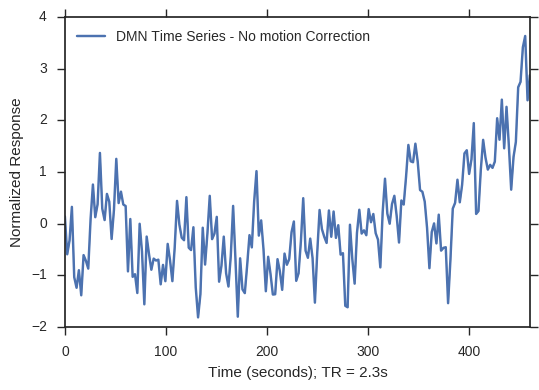

In [23]:
nocor = plot_time_series(time_series_data['0par'],
                 y_axis="Normalized Response",
                 title="DMN Time Series - No motion Correction",
                 time_course=TR_time, TR_value=TR)

#  6 parameter model motion correction

Here we show you what happens to the nodes of the DMN when you perform motion correction using the 6 parameter model.

In [22]:
Brain([os.path.abspath("data/rest_6mot_DMN.nii.gz"),os.path.abspath("data/rest_6mot.nii.gz")],8889)

doing checks /home/caroline/.jupyter/custom/


#### DMN time series with 6 motion correction parameters
Below is the time series extracted from the red DMN nodes shown in the brain above.

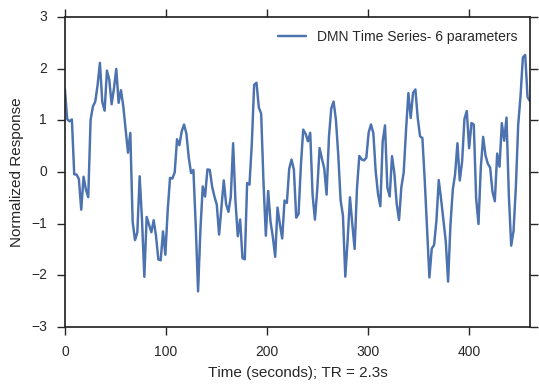

In [27]:
cor6 = plot_time_series(time_series_data['6par'],
                 y_axis="Normalized Response",
                 title="DMN Time Series- 6 parameters",
                 time_course=TR_time, TR_value=TR)

# Friston 24 Parameter Model Motion Correction

Here we show you what happens to the nodes of the DMN when you perform motion correction using the Friston 24 parameter model.

In [24]:
Brain([os.path.abspath("data/rest_24mot_DMN.nii.gz"),os.path.abspath("data/rest_24mot.nii.gz")],port=8889)

doing checks /home/caroline/.jupyter/custom/


#### DMN time series with 24 motion correction parameters
Below is the time series extracted from the red DMN nodes shown in the brain above.

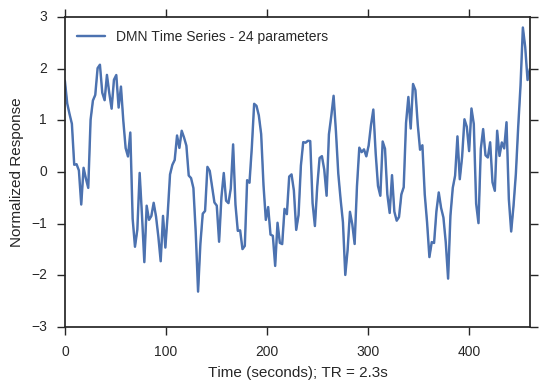

In [28]:
plot_time_series(time_series_data['24par'],
                 y_axis="Normalized Response",
                 title="DMN Time Series - 24 parameters",
                 time_course=TR_time, TR_value=TR)

In [46]:
time_series_data['time'] = TR_time

In [47]:
print(time_series_data.head())

       0par      6par     24par      time
0  0.140865  1.610095  1.766421  0.000000
1 -0.592743  1.021467  1.327812  2.311558
2 -0.322266  0.980407  1.120487  4.623116
3  0.325428  1.018214  0.932719  6.934673
4 -1.035378 -0.045513  0.140390  9.246231


In [50]:
# show time courses overlaid

all_par = pd.melt(time_series_data, id_vars=['time'],
                  value_vars =['0par', '6par', '24par'], 
                  value_name= 'Normalized Response',
                  var_name = 'Parameter')

print(all_par.head())

       time Parameter  Normalized Response
0  0.000000      0par             0.140865
1  2.311558      0par            -0.592743
2  4.623116      0par            -0.322266
3  6.934673      0par             0.325428
4  9.246231      0par            -1.035378


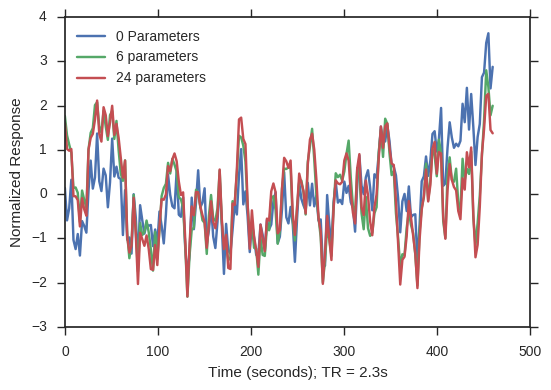

In [88]:
#plot_time_series(data=all_par,
#                 y_axis="Normalized Response",
#                 title="Parameter",
#                 time_course="time",
#                 TR_value=TR)

fig, ax = plt.subplots(1)
for key, group in all_par.groupby(['Parameter']): 
    ax.plot(group['time'], group['Normalized Response'])
plt.legend(["0 Parameters", "6 parameters", "24 parameters"], loc="upper left")  
plt.xlabel("Time (seconds); TR = {}s".format(TR))
plt.ylabel("Normalized Response")
plt.show()

In [153]:
#plot_time_series(data=all_par,
#                 y_axis="Normalized Response",
#                 title="Parameter",
#                 time_course="time",
#                 TR_value=TR)

from bokeh import mpl
from bokeh.io import output_notebook

fig, ax = plt.subplots(1)
for key, group in all_par.groupby(['Parameter']): 
    ax.plot(group['time'], group['Normalized Response'])
plt.legend(["0 Parameters", "6 parameters", "24 parameters"], loc="upper left")  
plt.xlabel("Time (seconds); TR = {}s".format(TR))
plt.ylabel("Normalized Response")
plt.show()

Loading BokehJS ...

### Vision for the future
This is what you get for now! You can use this notebook as a template to demonstrate the effects of all of your various preprocessing choices. We plan to load this to mybinder.

Note that this tutorial only used one subject, one preprocessing pipeline, and one outcome. We hope this notebook provides a way to explore your own data and emphasize all the differences these small changes can make.

In [122]:
from bokeh.layouts import row, widgetbox
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook

x = TR_time
y0 = time_series_data['0par']
y1 = time_series_data['6par']
y2 = time_series_data['24par']

source = ColumnDataSource(data=dict(x=x, y=y0))

plot = figure(y_range=(-4, 4), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.get('data');
    var A = par.get('value')
    x = data['x']
    y = data['y'];
    source.trigger('change');
""")

parameter_slider = Slider(start=0, end=10, value=1, step=.1,
                    title="Motion Parameters", callback=callback)
callback.args["par"] = parameter_slider


layout = row(
    plot,
    widgetbox(parameter_slider),
)

output_notebook()

show(layout,notebook_handle=True)

Loading BokehJS ...

ERROR:/usr/local/anaconda/lib/python2.7/site-packages/bokeh/core/validation/check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 19f87124-10ce-44ab-9c1e-e1cca08cefbe
ERROR:/usr/local/anaconda/lib/python2.7/site-packages/bokeh/core/validation/check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: e4265958-f32d-49f7-a90c-31754d720397
ERROR:/usr/local/anaconda/lib/python2.7/site-packages/bokeh/core/validation/check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 8ab5331d-de82-4e04-a2c6-20e945a97848
ERROR:/usr/local/anaconda/lib/python2.7/site-packages/bokeh/core/validation/check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 4f84622e-